# LDPC parameters estimation

Following notebook shows dependence between regular LDPC
code parameters and its error correction availability

In [149]:
import sys
sys.path.insert(0, '../../src')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import time


from LDPC import LDPC

## Row weight 

Smaller row weight allows to correct more errors

In [155]:
n = 512
d_v = 6
D_c = [256, 128, 64, 32, 16, 8]

T = []
E = []

for d_c in D_c:   
    ldpc = LDPC.from_params(n, d_v, d_c)
    
    start = time.time()
    e = ldpc.guess_code_max_error()
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)

In [156]:
print(T)
print(E)

[2.1741719245910645, 4.480963706970215, 8.66971230506897, 10.58681607246399, 76.78483843803406, 461.59837222099304]
[1, 1, 1, 2, 10, 29]


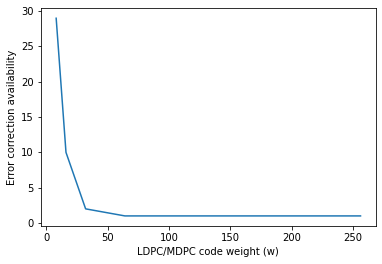

In [207]:
E = [1, 1, 1, 2, 10, 29]
D_c = [256, 128, 64, 32, 16, 8]

plt.xlabel('LDPC/MDPC code weight (w)')
plt.ylabel('Error correction availability')
plt.plot(D_c, E)

## Column weight

Bigger column weight allows to correct more errors,
but decreases code speed

In [160]:
n = 256
D_v = [2, 3, 4, 5, 6, 7]
d_c = 8

T = []
E = []

for d_v in D_v:   
    ldpc = LDPC.from_params(n, d_v, d_c)
    
    start = time.time()
    e = ldpc.guess_code_max_error()
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)

In [161]:
print(T)
print(E)

[2.3822388648986816, 3.525219202041626, 14.723495960235596, 31.57197642326355, 45.371867179870605, 69.29059481620789]
[1, 1, 5, 9, 11, 14]


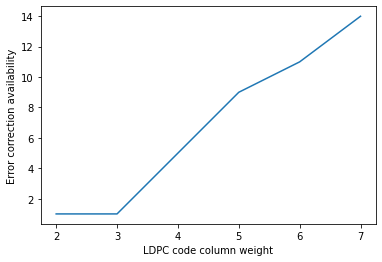

In [209]:
E = [1, 1, 5, 9, 11, 14]
D_v = [2, 3, 4, 5, 6, 7]

plt.xlabel('LDPC code column weight')
plt.ylabel('Error correction availability')
plt.plot(D_v, E)

## Matrix size

Bigger matrix allows to fix more errors (almost linearly)

In [169]:
N = [64, 125, 216, 343, 512]
D_v = [3, 4, 5, 6, 7]
D_c = [4, 5, 6, 7, 8]

T = []
E = []

for n, d_v, d_c in zip(N, D_v, D_c):   
    ldpc = LDPC.from_params(n, d_v, d_c)
    
    start = time.time()
    e = ldpc.guess_code_max_error()
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)

In [170]:
print(T)
print(E)

[0.6046299934387207, 2.965343952178955, 50.85605788230896, 214.42108273506165, 589.0650064945221]
[1, 2, 14, 23, 32]


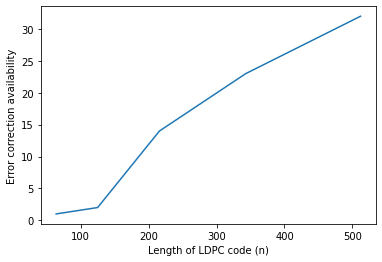

In [205]:
N = [64, 125, 216, 343, 512]
E = [1, 2, 14, 23, 32]

plt.xlabel('Length of LDPC code (n)')
plt.ylabel('Error correction availability')
plt.plot(N, E)

## Errors distribution

Error amount that random LDPC code with the fixed parameters
can correct looks like log-normal distributed

In [172]:
n = 300
d_v = 4
d_c = 6

T = []
E = []

for i in range(100):   
    ldpc = LDPC.from_params(n, d_v, d_c)
    
    start = time.time()
    e = ldpc.guess_code_max_error()
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)

In [174]:
print(T)
print(E)

[44.41245484352112, 50.744369983673096, 40.74383187294006, 50.000195264816284, 45.087353467941284, 36.72335982322693, 52.270604848861694, 40.85511589050293, 62.806867361068726, 58.685871601104736, 38.439767599105835, 60.64969515800476, 56.48522901535034, 50.43209886550903, 44.60025382041931, 58.9188916683197, 49.26348280906677, 56.22458529472351, 62.05170035362244, 59.639084339141846, 69.14981436729431, 56.31423735618591, 58.2521276473999, 35.98160910606384, 61.01483130455017, 45.56423568725586, 30.36520028114319, 39.68995237350464, 39.19375252723694, 45.46046304702759, 40.65165615081787, 49.3187735080719, 51.8379430770874, 45.10949683189392, 31.332433462142944, 55.64000201225281, 56.055347204208374, 55.71418333053589, 48.6735954284668, 26.86133360862732, 44.66936779022217, 55.84046006202698, 35.63776636123657, 35.87015175819397, 61.13810658454895, 57.47936534881592, 50.88928413391113, 44.03213667869568, 61.98542761802673, 47.33719348907471, 61.60632634162903, 61.87697911262512, 43.462

Mean is 10.98
E is 10.98
STD is 1.9948934808655823


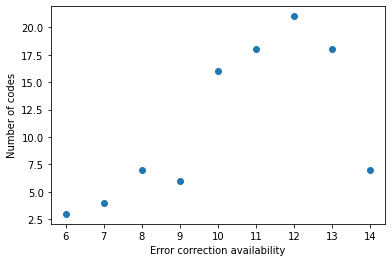

In [212]:
E = [10, 11, 9, 11, 10, 8, 11, 9, 13, 13, 9, 13, 12, 11, 10, 13, 10, 12, 13, 12, 14, 12, 12, 8, 13, 10, 7, 9, 9, 10, 9, 11, 10, 10, 7, 12, 12, 12, 11, 6, 10, 12, 8, 8, 13, 12, 11, 10, 13, 10, 13, 13, 10, 11, 14, 13, 8, 14, 12, 10, 13, 12, 6, 12, 13, 12, 11, 8, 7, 14, 14, 12, 12, 13, 6, 8, 12, 13, 11, 14, 11, 11, 13, 10, 12, 11, 10, 7, 14, 12, 13, 11, 12, 11, 11, 11, 13, 11, 12, 10]

from collections import Counter

c = Counter(E)

items = list(c.items())
data = np.array(items, dtype=int).T

print("Mean is", np.mean(E))
print("E is", np.average(E))
print("STD is", np.std(E))

plt.xlabel('Error correction availability')
plt.ylabel('Number of codes')
plt.scatter(*data)